In [34]:
import pandas as pd
import numpy as np
import cv2
import PIL
import tensorflow as tf
from tensorflow import keras
import pathlib
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
data_set_path="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [3]:
datset_path=keras.utils.get_file("flower_photos",origin=data_set_path,cache_dir=".",untar=True)

228813984/228813984 [==============================] - 11s 0us/step


In [4]:
dataset_path=pathlib.Path(datset_path)

In [5]:
dataset_path

PosixPath('datasets/flower_photos')

In [6]:
list(dataset_path.glob("*/*.jpg"))[:5]

[PosixPath('datasets/flower_photos/roses/15802657001_40fe77c030_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2300959680_8d22fa5ee2.jpg'),
 PosixPath('datasets/flower_photos/roses/19271410704_932d1f2c97_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12243068283_ee4c2683e2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12395698413_c0388278f7.jpg')]

In [7]:
list(dataset_path.glob("roses/*.jpg"))[:5]

[PosixPath('datasets/flower_photos/roses/15802657001_40fe77c030_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2300959680_8d22fa5ee2.jpg'),
 PosixPath('datasets/flower_photos/roses/19271410704_932d1f2c97_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12243068283_ee4c2683e2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12395698413_c0388278f7.jpg')]

In [8]:
list(dataset_path.glob("tulips/*.jpg"))[:5]

[PosixPath('datasets/flower_photos/tulips/13562266594_69b807f90c.jpg'),
 PosixPath('datasets/flower_photos/tulips/13954659583_03981dea99_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/738207467_fc59cfcd9b_z.jpg'),
 PosixPath('datasets/flower_photos/tulips/12025042086_78bafc0eb6_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/112334842_3ecf7585dd.jpg')]

In [9]:
image_count=len(list(dataset_path.glob("tulips/*.jpg")))

In [10]:
image_count

799

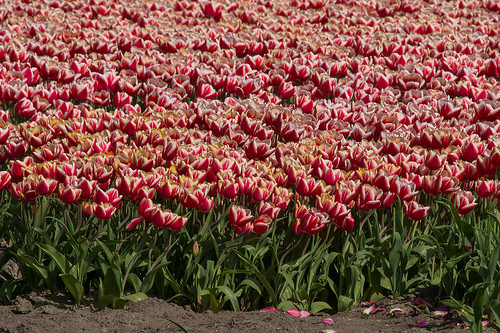

In [11]:
PIL.Image.open(list(dataset_path.glob("tulips/*.jpg"))[0])

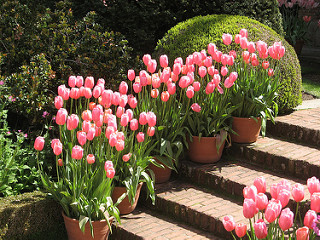

In [12]:
PIL.Image.open(list(dataset_path.glob("tulips/*.jpg"))[32])

In [13]:
flowers_images_dict = {
    'roses': list(dataset_path.glob('roses/*')),
    'daisy': list(dataset_path.glob('daisy/*')),
    'dandelion': list(dataset_path.glob('dandelion/*')),
    'sunflowers': list(dataset_path.glob('sunflowers/*')),
    'tulips': list(dataset_path.glob('tulips/*')),
}

In [14]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [15]:
flowers_images_dict["roses"][:5]

[PosixPath('datasets/flower_photos/roses/15802657001_40fe77c030_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2300959680_8d22fa5ee2.jpg'),
 PosixPath('datasets/flower_photos/roses/19271410704_932d1f2c97_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12243068283_ee4c2683e2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12395698413_c0388278f7.jpg')]

array([[[ 98, 101, 108],
        [131, 135, 139],
        [128, 133, 138],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 58,  61,  68],
        [ 76,  80,  88],
        [ 74,  79,  87],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 61,  64,  70],
        [ 79,  84,  93],
        [ 76,  82,  92],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 53,  60,  65],
        [ 69,  78,  86],
        [ 68,  76,  82],
        ...,
        [159, 162, 167],
        [160, 162, 166],
        [175, 176, 181]],

       [[ 56,  63,  67],
        [ 72,  80,  87],
        [ 73,  79,  85],
        ...,
        [167, 169, 174],
        [167, 169, 173],
        [183, 184, 188]],

       [[ 37,  39,  41],
        [ 43,  48,  52],
        [ 44,  47,  51],
        ...,
        [100, 101, 105],
        [ 99, 101, 105],
        [117, 118, 122]]], dtype=uint8)
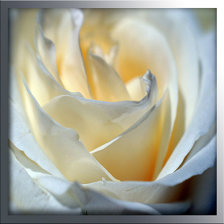

In [16]:
np.array(PIL.Image.open(flowers_images_dict["roses"][1]).resize((224,224)))

In [17]:
x,y=list(),list()
for labels,images in flowers_images_dict.items():
    for image in images:
      # print(PIL.Image.open(image))
      img=np.array(PIL.Image.open(image).resize((224,224)))

      x.append(img)
      y.append(flowers_labels_dict[labels])


In [18]:
type(x)

list

In [19]:
x=np.array(x)
y=np.array(y)

In [37]:
y.shape

(3670,)

In [24]:
import tensorflow_hub as hub
m = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224, 224, 3)),
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-feature-vector/4", output_shape=[1280],
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(5, activation='softmax')
])
m.build([None, 224, 224, 3])

In [25]:
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [26]:
m.compile(optimizer="Adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [27]:
m.fit(x,y,epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


115/115 [==============================] - 11s 42ms/step - loss: 0.6800 - accuracy: 0.7621
Epoch 2/10
115/115 [==============================] - 4s 35ms/step - loss: 0.3304 - accuracy: 0.8929
Epoch 3/10
115/115 [==============================] - 4s 37ms/step - loss: 0.2654 - accuracy: 0.9104
Epoch 4/10
115/115 [==============================] - 4s 34ms/step - loss: 0.2246 - accuracy: 0.9253
Epoch 5/10
115/115 [==============================] - 4s 35ms/step - loss: 0.1974 - accuracy: 0.9398
Epoch 6/10
115/115 [==============================] - 4s 36ms/step - loss: 0.1698 - accuracy: 0.9512
Epoch 7/10
115/115 [==============================] - 4s 34ms/step - loss: 0.1540 - accuracy: 0.9561
Epoch 8/10
115/115 [==============================] - 4s 34ms/step - loss: 0.1349 - accuracy: 0.9678
Epoch 9/10
115/115 [==============================] - 4s 35ms/step - loss: 0.1224 - accuracy: 0.9708
Epoch 10/10
115/115 [==============================] - 4s 37ms/step - loss: 0.1110 - accuracy: 0.9752

In [30]:
preds=[np.argmax(i) for i in m.predict(x[:400])]

13/13 [==============================] - 0s 36ms/step


In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
print(confusion_matrix(preds,y[:400]))

[[388   0   0   0]
 [  2   0   0   0]
 [  1   0   0   0]
 [  9   0   0   0]]
